In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("loan.csv")
df

,LoanID,Sex,Married,People,Educ,SelfEmployed,Income,CoappIncome,LoanAmount,Loan_Amount_Term,CreditHistory,Area,Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [322]:
df.isnull().sum()

LoanID               0
Sex                  5
Married              0
People               8
Educ                 0
SelfEmployed        21
Income               0
CoappIncome          0
LoanAmount           0
Loan_Amount_Term    11
CreditHistory       30
Area                 0
Status               0
dtype: int64

In [323]:
cat_columns = ['LoanID', 'Sex', 'Married', 'People', 'Educ',
       'SelfEmployed','CreditHistory','Area', 'Status',]
cat_columns
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Irakli\AppData\Local\Temp\ipykernel_18340\2858680915.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [324]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df.drop(columns='LoanID', inplace=True)
df['People'] = df['People'].replace(['1', '0', '2', '3+'], [0, 1, 2, 3])
df['CreditHistory'] = df['CreditHistory'].astype(int)
df.isnull().sum()

C:\Users\Irakli\AppData\Local\Temp\ipykernel_18340\3547937299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
C:\Users\Irakli\AppData\Local\Temp\ipykernel_18340\3547937299.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

Sex                 0
Married             0
People              0
Educ                0
SelfEmployed        0
Income              0
CoappIncome         0
LoanAmount          0
Loan_Amount_Term    0
CreditHistory       0
Area                0
Status              0
dtype: int64

In [325]:
df.dtypes

Sex                  object
Married              object
People                int64
Educ                 object
SelfEmployed         object
Income                int64
CoappIncome         float64
LoanAmount          float64
Loan_Amount_Term    float64
CreditHistory         int32
Area                 object
Status               object
dtype: object

In [326]:
obj_columns = ['Sex', 'Married', 'Educ',
       'SelfEmployed','Area', 'Status',]

obj = LabelEncoder()
for col in obj_columns:
    df[col] = obj.fit_transform(df[col])
df

,Sex,Married,People,Educ,SelfEmployed,Income,CoappIncome,LoanAmount,Loan_Amount_Term,CreditHistory,Area,Status
0,1,1,0,0,0,4583,1508.0,128.0,360.0,1,0,0
1,1,1,1,0,1,3000,0.0,66.0,360.0,1,2,1
2,1,1,1,1,0,2583,2358.0,120.0,360.0,1,2,1
3,1,0,1,0,0,6000,0.0,141.0,360.0,1,2,1
4,1,1,1,1,0,2333,1516.0,95.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,5703,0.0,128.0,360.0,1,2,1
377,1,1,1,0,0,3232,1950.0,108.0,360.0,1,0,1
378,0,0,1,0,0,2900,0.0,71.0,360.0,1,0,1
379,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1


In [327]:
scale = MinMaxScaler()

col_columns = ['Income','CoappIncome','LoanAmount','Loan_Amount_Term', 'Area']

for col in col_columns:
    df[col] = scale.fit_transform(df[col].values.reshape(-1,1))
df

,Sex,Married,People,Educ,SelfEmployed,Income,CoappIncome,LoanAmount,Loan_Amount_Term,CreditHistory,Area,Status
0,1,1,0,0,0,0.464043,0.044567,0.843972,0.743590,1,0.0,0
1,1,1,1,0,1,0.298336,0.000000,0.404255,0.743590,1,1.0,1
2,1,1,1,1,0,0.254684,0.069687,0.787234,0.743590,1,1.0,1
3,1,0,1,0,0,0.612373,0.000000,0.936170,0.743590,1,1.0,1
4,1,1,1,1,0,0.228515,0.044803,0.609929,0.743590,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,0.581283,0.000000,0.843972,0.743590,1,1.0,1
377,1,1,1,0,0,0.322621,0.057629,0.702128,0.743590,1,0.0,1
378,0,0,1,0,0,0.287868,0.000000,0.439716,0.743590,1,0.0,1
379,1,1,3,0,0,0.414111,0.000000,0.219858,0.358974,1,0.0,1


In [328]:
X = df.drop(columns='Status')
y = df['Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)
X_train.shape, X_test.shape

((304, 11), (77, 11))

In [329]:
X_test

,Sex,Married,People,Educ,SelfEmployed,Income,CoappIncome,LoanAmount,Loan_Amount_Term,CreditHistory,Area
355,1,0,1,0,0,0.333194,0.000000,0.432624,0.743590,1,1.0
25,0,1,1,0,0,0.368157,0.043118,0.957447,0.743590,1,0.5
324,1,1,1,0,0,0.207265,0.197003,0.432624,0.358974,1,0.5
270,1,1,1,0,0,0.263373,0.127080,0.794326,0.743590,1,0.0
374,1,0,1,1,0,0.385533,0.000000,0.716312,0.743590,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
268,1,1,1,0,0,0.174814,0.050802,0.645390,0.743590,1,1.0
142,1,1,1,0,0,0.373286,0.000000,0.234043,0.358974,1,0.0
123,0,0,1,1,0,0.445724,0.000000,0.787234,0.743590,1,0.5
356,1,1,3,0,0,0.340207,0.073884,0.808511,0.743590,0,0.0


In [330]:
X_train

,Sex,Married,People,Educ,SelfEmployed,Income,CoappIncome,LoanAmount,Loan_Amount_Term,CreditHistory,Area
137,1,1,2,0,0,0.403957,0.050743,0.758865,0.74359,1,0.5
120,1,1,0,1,0,0.256464,0.073884,0.574468,0.74359,1,0.5
118,0,0,1,1,0,0.183921,0.069894,0.787234,0.74359,1,1.0
196,0,0,1,0,0,0.289647,0.000000,0.531915,0.74359,1,0.5
9,1,0,1,0,0,0.502460,0.000000,0.822695,0.74359,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
282,1,1,0,0,1,0.347116,0.035760,0.858156,0.74359,1,0.0
89,1,1,1,0,0,0.266722,0.060112,0.801418,0.74359,1,0.5
243,1,0,1,1,0,0.229875,0.047286,0.872340,0.74359,1,0.5
321,1,0,1,0,0,0.359364,0.000000,0.617021,0.74359,1,1.0


In [331]:
mlpc = MLPClassifier(hidden_layer_sizes=(10, 10), 
                     max_fun=25, max_iter=1000, random_state=1, activation="relu", solver="adam")
mlpc.fit(X_train, y_train)

c:\Users\Irakli\Desktop\practice\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_fun=25, max_iter=1000,
              random_state=1)

In [332]:
y_predict = mlpc.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [333]:
mlpc_accuracy = accuracy_score(y_test,y_predict)
mlpc_precision = precision_score(y_test,y_predict)
mlpc_recall = recall_score(y_test,y_predict)
print("Правильность: {}".format(mlpc_accuracy))
print("Полнота: {}".format(mlpc_recall))
print("Точность: {}".format(mlpc_precision))


Правильность: 0.8701298701298701
Полнота: 0.9464285714285714
Точность: 0.8833333333333333


In [334]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [335]:
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("Правильность XGBOOST:", xgb_acc)

Правильность XGBOOST: 0.8181818181818182


In [336]:
#задаём необходимые параметры
xgb_model = XGBClassifier()
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [337]:
#лучшие параметры
best_params = grid_search.best_params_

best_xgb_model = XGBClassifier(**best_params)
print("Лучшие параметры : ", best_params)
print("Лучшая модель XGBoost: ", best_xgb_model)

Лучшие параметры :  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}
Лучшая модель XGBoost:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [338]:
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

#задаём метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Правильность XGBoost после улучшения :', accuracy)
print('Полнота XGBoost после улучшения :', recall)
print('Точность XGBoost после улучшения :', precision)

Правильность XGBoost после улучшения : 0.8831168831168831
Полнота XGBoost после улучшения : 0.9821428571428571
Точность XGBoost после улучшения : 0.873015873015873


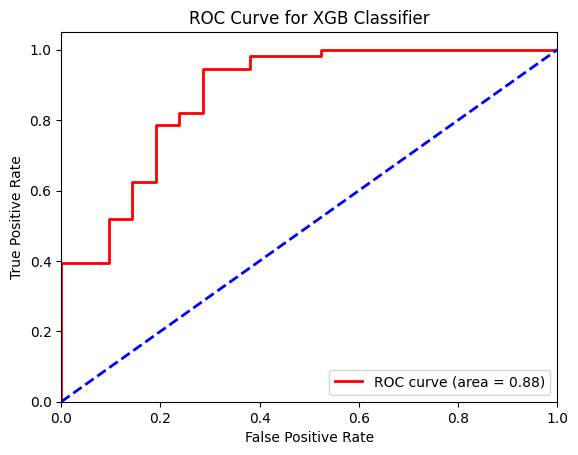

In [339]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB Classifier')
plt.legend(loc="lower right")
plt.show()